In [ ]:
!wget https://snap.stanford.edu/snappy/release/snap-stanford-6.0.0.tar.gz  # Change the version number as necessary
!tar -xvf snap-stanford-6.0.0.tar.gz


--2024-03-18 02:47:43--  https://snap.stanford.edu/snappy/release/snap-stanford-6.0.0.tar.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-03-18 02:47:43 ERROR 404: Not Found.

tar: snap-stanford-6.0.0.tar.gz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
%cd snap-stanford-5.0.0
!make all


##Problem 2.1
Import Email-EuAll.txt and soc-Epinions1.txt to local folder

In [ ]:
import snap

# Load the Epinions network
epinions = snap.LoadEdgeList(snap.PNGraph, "soc-Epinions1.txt", 0, 1)

# Perform forward and backward BFS starting at nodes 9809 and 1952
fw_tree_9809 = snap.GetBfsTree(epinions, 9809, True, False)
bw_tree_9809 = snap.GetBfsTree(epinions, 9809, False, True)
fw_tree_1952 = snap.GetBfsTree(epinions, 1952, True, False)
bw_tree_1952 = snap.GetBfsTree(epinions, 1952, False, True)

print('Forward BFS for node 9809:', fw_tree_9809.GetNodes())
print('Backward BFS for node 9809:',bw_tree_9809.GetNodes())
print('Forward BFS for node 1952:', fw_tree_1952.GetNodes())
print('Backward BFS for node 1952:',bw_tree_1952.GetNodes())


# Determine the component type based on the structure of the BFS trees
if fw_tree_9809.IsNode(1952) and bw_tree_9809.IsNode(1952):
    print("Node 9809 and node 1952 belong to the SCC component of the Epinions network")
elif fw_tree_9809.IsNode(1952):
    print("Node 9809 belongs to the OUT component and node 1952 belongs to the IN component of the Epinions network")
elif bw_tree_9809.IsNode(1952):
    print("Node 9809 belongs to the IN component and node 1952 belongs to the OUT component of the Epinions network")
else:
    print("Node 9809 and node 1952 belong to different components in the Epinions network")


# Load the Email network
email = snap.LoadEdgeList(snap.PNGraph, "Email-EuAll.txt", 0, 1)

# Perform forward and backward BFS starting at nodes 189587 and 675
fw_tree_189587 = snap.GetBfsTree(email, 189587, True, False)
bw_tree_189587 = snap.GetBfsTree(email, 189587, False, True)
fw_tree_675 = snap.GetBfsTree(email, 675, True, False)
bw_tree_675 = snap.GetBfsTree(email, 675, False, True)

print('Forward BFS for node 189587:', fw_tree_189587.GetNodes())
print('Backward BFS for node 189587:',bw_tree_189587.GetNodes())
print('Forward BFS for node 675:', fw_tree_675.GetNodes())
print('Backward BFS for node 675:',bw_tree_675.GetNodes())

# Determine the component type based on the structure of the BFS trees
if fw_tree_189587.IsNode(675) and bw_tree_189587.IsNode(675):
    print("Node 189587 and node 675 belong to the SCC component of the Email network")
elif fw_tree_189587.IsNode(675):
    print("Node 189587 belongs to the OUT component and node 675 belongs to the IN component of the Email network")
elif bw_tree_189587.IsNode(675):
    print("Node 189587 belongs to the IN component and node 675 belongs to the OUT component of the Email network")
else:
    print("Node 189587 and node 675 belong to different components in the Email network")


Forward BFS for node 9809: 1
Backward BFS for node 9809: 56460
Forward BFS for node 1952: 47677
Backward BFS for node 1952: 1
Node 9809 belongs to the IN component and node 1952 belongs to the OUT component of the Epinions network
Forward BFS for node 189587: 52103
Backward BFS for node 189587: 185226
Forward BFS for node 675: 1
Backward BFS for node 675: 185240
Node 189587 belongs to the OUT component and node 675 belongs to the IN component of the Email network


#**Problem 2.2:**

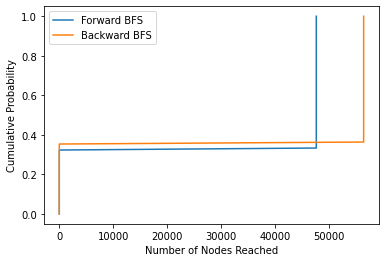

In [ ]:
import random

# Choose 100 random nodes
random_nodes = random.sample(range(epinions.GetNodes()), 100)

# Forward and backward BFS for each node
fwd_nodes_reached = []
bwd_nodes_reached = []

for i in random_nodes:
    # Forward BFS
    fwd_bfs_tree = epinions.GetBfsTree(i, True, False)
    fwd_nodes_reached.append(fwd_bfs_tree.GetNodes())

    # Backward BFS
    bwd_bfs_tree = epinions.GetBfsTree(i, False, True)
    bwd_nodes_reached.append(bwd_bfs_tree.GetNodes())

import matplotlib.pyplot as plt
import numpy as np

# Plot the cumulative distribution for the forward BFS
fwd_nodes_reached.sort()
yvals = np.arange(len(fwd_nodes_reached))/float(len(fwd_nodes_reached)-1)
plt.plot(fwd_nodes_reached, yvals)

# Plot the cumulative distribution for the backward BFS
bwd_nodes_reached.sort()
yvals = np.arange(len(bwd_nodes_reached))/float(len(bwd_nodes_reached)-1)
plt.plot(bwd_nodes_reached, yvals)

plt.legend(['Forward BFS', 'Backward BFS'])
plt.xlabel('Number of Nodes Reached')
plt.ylabel('Cumulative Probability')
plt.show()


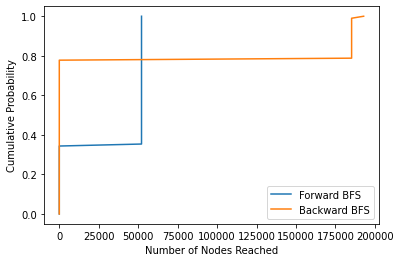

In [ ]:
import random

# Choose 100 random nodes
random_nodes = random.sample(range(email.GetNodes()), 100)

# Forward and backward BFS for each node
fwd_nodes_reached = []
bwd_nodes_reached = []
#forward is inward
for i in random_nodes:
    # Forward BFS
    fwd_bfs_tree = email.GetBfsTree(i, True, False)
    fwd_nodes_reached.append(fwd_bfs_tree.GetNodes())

    # Backward BFS
    bwd_bfs_tree = email.GetBfsTree(i, False, True)
    bwd_nodes_reached.append(bwd_bfs_tree.GetNodes())


import matplotlib.pyplot as plt
import numpy as np

# Plot the cumulative distribution for the forward BFS
fwd_nodes_reached.sort()
yvals = np.arange(len(fwd_nodes_reached))/float(len(fwd_nodes_reached)-1)
plt.plot(fwd_nodes_reached, yvals)

# Plot the cumulative distribution for the backward BFS
bwd_nodes_reached.sort()
yvals = np.arange(len(bwd_nodes_reached))/float(len(bwd_nodes_reached)-1)
plt.plot(bwd_nodes_reached, yvals)

plt.legend(['Forward BFS', 'Backward BFS'])
plt.xlabel('Number of Nodes Reached')
plt.ylabel('Cumulative Probability')
plt.show()

During a BFS traversal, the number of reachable nodes will depend on the starting node and the component in which it is located.

*  If the starting node is in the SCC, then all nodes in the SCC will be reachable during the traversal.
*  If the starting node is in the IN component, then only nodes in the IN and SCC components will be reachable
*   If the starting node is in the OUT component, then only nodes in the OUT and SCC components will be reachable
*   Finally, if the starting node is in the Tendrils and Tubes component, then only a subset of nodes in the other components will be reachable, depending on their connectivity to the starting node.

From these traversals, we can infer various properties of the graph, such as its connectivity, whether it contains cycles, the distance between vertices, and the existence of paths between vertices.

#**Problem 2.3:**

In [ ]:
#For epinion network

NoNodes_GEp = epinions.GetNodes()

scc_size_Ep = int(NoNodes_GEp * snap.GetMxSccSz(epinions))

MxScc_Ep = snap.GetMxScc(epinions)
Nd_Rch_Ep = set()
for Ed_Ep in MxScc_Ep.Edges():
    Nd_Rch_Ep.add(Ed_Ep.GetSrcNId())
    Nd_Rch_Ep.add(Ed_Ep.GetDstNId())

nd_in_scc_Ep = random.sample(Nd_Rch_Ep, 1)[0]

bfs_ep_out = snap.GetBfsTree(epinions, nd_in_scc_Ep, True, False)
nrp = set()
for edge in bfs_ep_out.Edges():
		nrp.add(edge.GetSrcNId())
		nrp.add(edge.GetDstNId())

bfs_ep_in = snap.GetBfsTree(epinions, nd_in_scc_Ep, False, True)
nrp1 = set()
for edge in bfs_ep_in.Edges():
		nrp1.add(edge.GetSrcNId())
		nrp1.add(edge.GetDstNId())

out_scc_ep = len(nrp)
in_scc_ep = len(nrp1)
in_size_ep = in_scc_ep - scc_size_Ep
out_size_ep = out_scc_ep - scc_size_Ep
print("Number of Nodes in SCC region in Epinions Network:",scc_size_Ep)
print('Number of Nodes in IN region in Epinions Network:', in_size_ep)
print('Number of Nodes in OUT region in Epinions Network:', out_size_ep)

print('Number of Nodes in Tendrils region in Epinions Network:', int(snap.GetMxWccSz(epinions) * NoNodes_GEp) - in_size_ep - out_size_ep - scc_size_Ep)
print('Number of Nodes in Disconnected region in Epinions Network:', NoNodes_GEp - int(snap.GetMxWccSz(epinions)))

# For email network

NoNodes_email = email.GetNodes()
NoEdges_email = email.GetEdges()
scc_size_Ep = int(NoNodes_email * snap.GetMxSccSz(email))


MxScc_Ep = snap.GetMxScc(email)
Nd_Rch_Ep = set()
for Ed_Ep in MxScc_Ep.Edges():
    Nd_Rch_Ep.add(Ed_Ep.GetSrcNId())
    Nd_Rch_Ep.add(Ed_Ep.GetDstNId())

nd_in_scc_Ep = random.sample(Nd_Rch_Ep, 1)[0]

bfs_ep_out = snap.GetBfsTree(email, nd_in_scc_Ep, True, False)
nrp = set()
for edge in bfs_ep_out.Edges():
		nrp.add(edge.GetSrcNId())
		nrp.add(edge.GetDstNId())

bfs_ep_in = snap.GetBfsTree(email, nd_in_scc_Ep, False, True)
nrp1 = set()
for edge in bfs_ep_in.Edges():
		nrp1.add(edge.GetSrcNId())
		nrp1.add(edge.GetDstNId())

out_scc_ep = len(nrp)
in_scc_ep = len(nrp1)
in_size_ep = in_scc_ep - scc_size_Ep
out_size_ep = out_scc_ep - scc_size_Ep
print("Number of Nodes in SCC region in Email Network:",scc_size_Ep)
print('Number of Nodes in IN region in Email Network:', in_size_ep)
print('Number of Nodes in OUT region in Email Network:', out_size_ep)
print('Number of Nodes in Tendrils region in Email Network:', int(snap.GetMxWccSz(email) * NoNodes_email) - in_size_ep - out_size_ep - scc_size_Ep)
print('Number of Nodes in Disconnected region in Email Network:', NoNodes_email - int(snap.GetMxWccSz(email)))

<ipython-input-26-abf0891707a5>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nd_in_scc_Ep = random.sample(Nd_Rch_Ep, 1)[0]


Number of Nodes in SCC region in Epinions Network: 32223
Number of Nodes in IN region in Epinions Network: 24236
Number of Nodes in OUT region in Epinions Network: 15453
Number of Nodes in Tendrils region in Epinions Network: 3965
Number of Nodes in Disconnected region in Epinions Network: 75879


<ipython-input-26-abf0891707a5>:51: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nd_in_scc_Ep = random.sample(Nd_Rch_Ep, 1)[0]


Number of Nodes in SCC region in Email Network: 34203
Number of Nodes in IN region in Email Network: 151023
Number of Nodes in OUT region in Email Network: 17900
Number of Nodes in Tendrils region in Email Network: 21706
Number of Nodes in Disconnected region in Email Network: 265214


In [ ]:
#Without Snap for a sample of 100 Nodes
import random

# Epinions network
epinions_fwd_nodes_reached = []
epinions_bwd_nodes_reached = []
epinions_scc_nodes = []
epinions_in_nodes = []
epinions_out_nodes = []
epinions_tendrils_nodes = []
epinions_disconnected_nodes = []

# Randomly select 100 nodes
epinions_random_nodes = random.sample(range(epinions.GetNodes()), 100)

for i in epinions_random_nodes:
    # Forward BFS
    fwd_bfs_tree = epinions.GetBfsTree(i, True, False)
    epinions_fwd_nodes_reached.append(fwd_bfs_tree.GetNodes())

    # Backward BFS
    bwd_bfs_tree = epinions.GetBfsTree(i, False, True)
    epinions_bwd_nodes_reached.append(bwd_bfs_tree.GetNodes())

    # SCC nodes
    if fwd_bfs_tree.GetNodes() == bwd_bfs_tree.GetNodes():
        epinions_scc_nodes.append(i)

    # IN nodes
    elif fwd_bfs_tree.GetNodes() > bwd_bfs_tree.GetNodes():
        epinions_in_nodes.append(i)

    # OUT nodes
    elif fwd_bfs_tree.GetNodes() < bwd_bfs_tree.GetNodes():
        epinions_out_nodes.append(i)

    # TENDRILS nodes
    elif (fwd_bfs_tree.GetNodes() > 0) and (fwd_bfs_tree.GetNodes() < bwd_bfs_tree.GetNodes()):
        epinions_tendrils_nodes.append(i)

    # DISCONNECTED nodes
    else:
        epinions_disconnected_nodes.append(i)

print("Epinions network:")
print(f"SCC nodes: {len(epinions_scc_nodes)}")
print(f"IN nodes: {len(epinions_in_nodes)}")
print(f"OUT nodes: {len(epinions_out_nodes)}")
print(f"TENDRILS nodes: {len(epinions_tendrils_nodes)}")
print(f"DISCONNECTED nodes: {len(epinions_disconnected_nodes)}")

import random

# Email network
email_fwd_nodes_reached = []
email_bwd_nodes_reached = []
email_scc_nodes = []
email_in_nodes = []
email_out_nodes = []
email_tendrils_nodes = []
email_disconnected_nodes = []

# Randomly select 100 nodes
email_random_nodes = random.sample(range(email.GetNodes()), 100)

for i in email_random_nodes:
    # Forward BFS
    fwd_bfs_tree = email.GetBfsTree(i, True, False)
    email_fwd_nodes_reached.append(fwd_bfs_tree.GetNodes())

    # Backward BFS
    bwd_bfs_tree = email.GetBfsTree(i, False, True)
    email_bwd_nodes_reached.append(bwd_bfs_tree.GetNodes())

    # SCC nodes
    if fwd_bfs_tree.GetNodes() == bwd_bfs_tree.GetNodes():
        email_scc_nodes.append(i)

    # IN nodes
    elif fwd_bfs_tree.GetNodes() > bwd_bfs_tree.GetNodes():
        email_in_nodes.append(i)

    # OUT nodes
    elif fwd_bfs_tree.GetNodes() < bwd_bfs_tree.GetNodes():
        email_out_nodes.append(i)

    # TENDRILS nodes
    elif (fwd_bfs_tree.GetNodes() > 0) and (fwd_bfs_tree.GetNodes() < bwd_bfs_tree.GetNodes()):
        email_tendrils_nodes.append(i)

    # DISCONNECTED nodes
    else:
        email_disconnected_nodes.append(i)
print("")
print("email network:")
print(f"SCC nodes: {len(email_scc_nodes)}")
print(f"IN nodes: {len(email_in_nodes)}")
print(f"OUT nodes: {len(email_out_nodes)}")
print(f"TENDRILS nodes: {len(email_tendrils_nodes)}")
print(f"DISCONNECTED nodes: {len(email_disconnected_nodes)}")

Epinions network:
SCC nodes: 0
IN nodes: 30
OUT nodes: 70
TENDRILS nodes: 0
DISCONNECTED nodes: 0

email network:
SCC nodes: 0
IN nodes: 77
OUT nodes: 23
TENDRILS nodes: 0
DISCONNECTED nodes: 0
